In [6]:
import tensorflow as tf

### Steps in Modelling

1. Creating a model
2. Compiling a model
   1. Defining a loss function
   2. Setting up an optimizer
   3. Creating evaluation metrics
3. Fitting a model

* Evaluating a model
    - Visualizing the model
    - Looking at training curves
    - Compare predictions to the ground truth

- Saving a model
- Loading a model

### Typical architecture of regression neural network


- Input layer shape - same as shape
- Hidden layer - min=1, max=unlimited
- Neuron per hidden layer - generally 10 to 100
- Output layer shape - same shape as desired prediction shape
- Hidden activation - Usually ReLU(rectified linear unit)
- Output activation - Nonne, ReLU, logistic/tanh
- Loss function - MSE, MAE, Huber(combination of MSE and MAE)
- Optimizer - SGD, Adam

### Creating data to view and fit

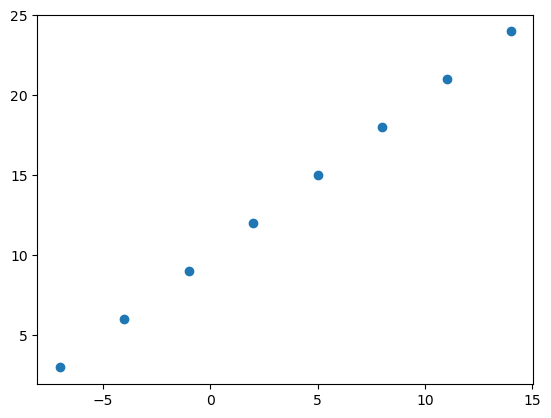

In [14]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# X=np.array([-7.0,-4.0,-1.5,3.0,6.0,7.2,11.3,14.0])
# # Create labels
# y = np.array([3.0, 6.0, 19.0, 22.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

In [112]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [113]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [114]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

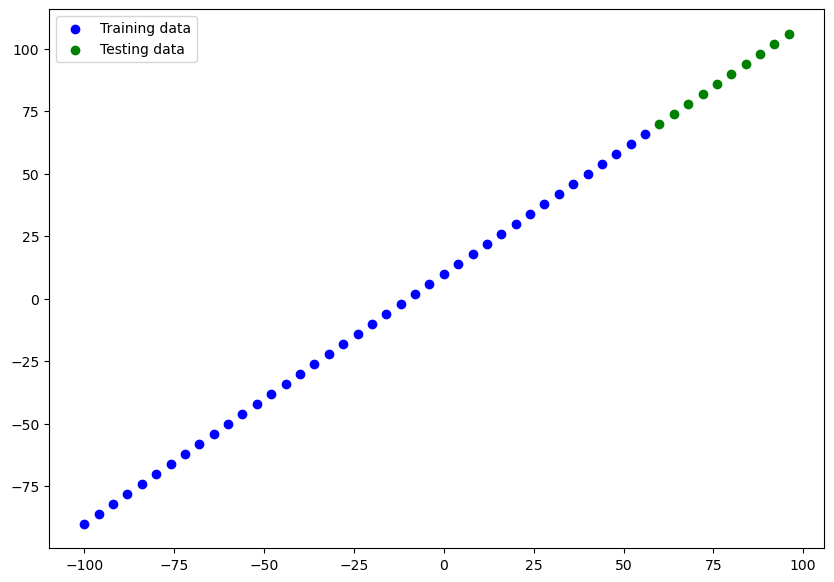

In [115]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

### Input and Output shapes


### Steps in modelling with Tensorflow

1. Creating a model-piece together the layers of a neural network (using the Functional or Sequential API) or import a previously build model(known as transfer learning).
2. Compiling a model-defining how a model's performance should be measured (loss/metrics) as well as definig how it should improve(optimizer).
3. Fitting a model-letting the model try to find patterns in the data.

In [40]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 148ms/step - loss: 15.0748 - mae: 15.0748
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 14.8586 - mae: 14.8586
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 14.7261 - mae: 14.7261
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 14.5936 - mae: 14.5936
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 14.4611 - mae: 14.4611


In [42]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [44]:
model.predict(X),model.predict([17.0])

1/1 [==============================] - 0s 31ms/step


(array([[ 1.7997364 ],
        [ 1.0487779 ],
        [ 0.2978195 ],
        [-0.45313895],
        [-1.2040974 ],
        [-1.9550558 ],
        [-2.7060144 ],
        [-3.4569728 ]], dtype=float32),
 array([[-4.207931]], dtype=float32))

### Improving a model
To improve our model, we alter almost every part of 3 steps we went through:
1. Creating a model-`add more layers`, increase the `number of hidden units(also called neurons) within each layer`, change the `activation functions of each layer`.
2. Compiling the model-choose `optimization function` or change the `learning rate` of the optimization function.
3. Fitting a model-fit the model for more `epochs`(leave it training for longer) or on `more data`(give the model more examples to learn from).



![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)

Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*


### Training for longer - more epochs

In [69]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100,verbose=0)

In [46]:
X,y

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.]),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [47]:
model.predict(X),model.predict([17.0])

1/1 [==============================] - 0s 28ms/step


(array([[-10.867907 ],
        [ -5.827733 ],
        [ -0.7875587],
        [  4.252616 ],
        [  9.292789 ],
        [ 14.332964 ],
        [ 19.373138 ],
        [ 24.413313 ]], dtype=float32),
 array([[29.453487]], dtype=float32))

### Evaluating a model

Typical workflow when building a neural network is:

```
Build a model->evaluate it->build(tweak) a model->evaluate it->build(tweak) a model->evaluate it....
```

*Evaluation means visualization*

Viualize:
1. The data
2. The model itself
3. The training of a model
4. The predictions of a model
   

### Visualizing the model

In [ ]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


If we try to visualize/summarize the model before building still it needs to know the `input_shape`.

We haven't told it what input shape it should be expecting.
We can let our model know the shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` is not defined, Keras tries to figure it out automatically)

In [62]:
tf.random.set_seed(42)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


In [63]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Calling `summary()` on our model show us the layers it contains, the output shape and the number of parameters.


In [65]:
model.fit(X,y,epochs=100,verbose=0)

In [66]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Alonside summary, we can also view a 2D plot of the model using `plot_model()`

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

### Visualizing the predictions

In [71]:
y_preds=model.predict(X)

1/1 [==============================] - 0s 31ms/step


In [72]:
y_preds

array([[-10.982939  ],
       [ -5.890251  ],
       [ -0.79756325],
       [  4.295125  ],
       [  9.387814  ],
       [ 14.480501  ],
       [ 19.573189  ],
       [ 24.665876  ]], dtype=float32)

In [118]:
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=y_preds):
    plt.figure(figsize=(10,7))
    plt.scatter(train_data,train_labels)
    plt.scatter(test_data,test_labels)
    plt.scatter(test_data,predictions)
    plt.legend();

C:\Users\alok4\AppData\Local\Temp\ipykernel_26444\2981448840.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


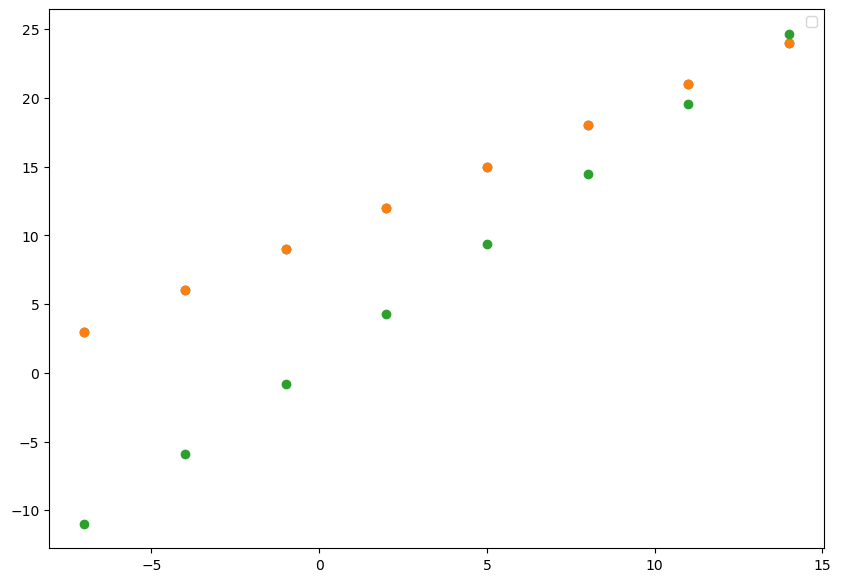

In [74]:
plot_predictions()

In [75]:
model.evaluate(X,y)

1/1 [==============================] - 0s 84ms/step - loss: 6.8250 - mae: 6.8250


[6.825000286102295, 6.825000286102295]

In [82]:
mae=tf.metrics.mean_absolute_error(y_true=y,y_pred=y_preds)
mae

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([24.48294  , 19.390251 , 14.297564 ,  9.528657 ,  6.6530466,
        6.       ,  7.5365944, 11.165876 ], dtype=float32)>

MAE should be a single output
- Instead, we get 10 values
This is because our `y` and `y_preds` tensors are different shapes.

In [77]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [78]:
y_preds

array([[-10.982939  ],
       [ -5.890251  ],
       [ -0.79756325],
       [  4.295125  ],
       [  9.387814  ],
       [ 14.480501  ],
       [ 19.573189  ],
       [ 24.665876  ]], dtype=float32)

In [79]:
y.shape,y_preds.shape

((8,), (8, 1))

We can fix it using `squeeze()`, it'll remove the 1 dimension from our `y_preds` tensor, making it the same shape as `y`. 

* If we are comparing two tensors, it's important to make sure they're the right shape(s) (we won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [84]:
y_preds.squeeze().shape

(8,)

In [83]:
y.squeeze().shape

(8,)

In [86]:
mae=tf.metrics.mean_absolute_error(y_true=y,y_pred=y_preds)
mae

<tf.Tensor: shape=(8,), dtype=float32, numpy=
array([24.48294  , 19.390251 , 14.297564 ,  9.528657 ,  6.6530466,
        6.       ,  7.5365944, 11.165876 ], dtype=float32)>

In [90]:
mae=tf.metrics.mean_absolute_error(y_true=y,y_pred=y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.8250003>

In [91]:
mse=tf.metrics.mean_squared_error(y_true=y,y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=67.32759>

In [92]:
tf.reduce_mean(tf.abs(y-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=6.825000129640102>

In [93]:
tf.reduce_mean(tf.square(y-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=67.3275854638657>

### Running experiments to improve a model

1. Get more data
2. Make model larger
3. Train for longer

In [94]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 162ms/step - loss: 8.2466 - mae: 8.2466
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 8.1141 - mae: 8.1141
Epoch 3/100
1/1 [==============================] - 0s 3ms/step - loss: 7.9816 - mae: 7.9816
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 7.8491 - mae: 7.8491
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 7.7166 - mae: 7.7166
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 7.5841 - mae: 7.5841
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4550 - mae: 7.4550
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4494 - mae: 7.4494
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4437 - mae: 7.4437
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 7.4381 - mae: 7.4381
Epoch 11/100
1/1 [==============================] - 0s 3ms/step - loss: 7.432

1/1 [==============================] - 0s 28ms/step


C:\Users\alok4\AppData\Local\Temp\ipykernel_26444\2981448840.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


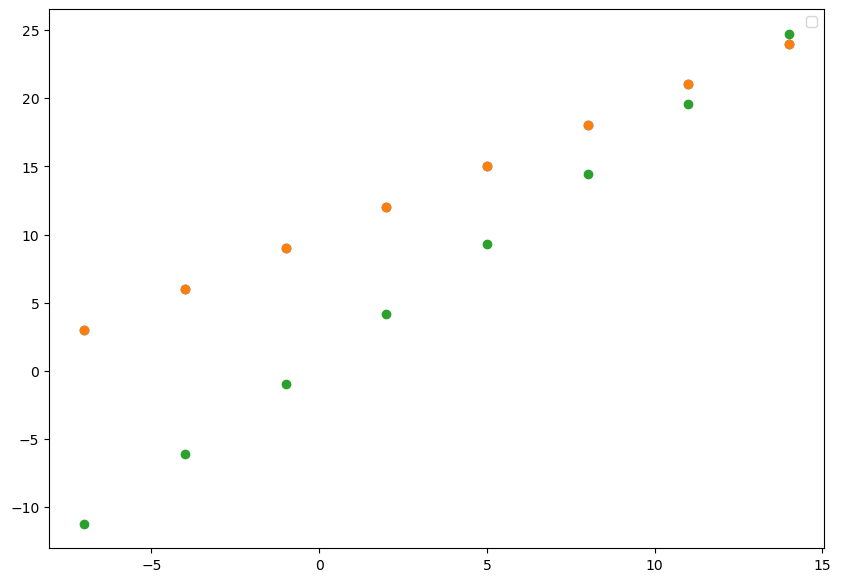

In [95]:
y_preds_1=model_1.predict(X)
plot_predictions(predictions=y_preds_1)

In [97]:
mae_1=tf.keras.metrics.mean_absolute_error(y_pred=y_preds_1.squeeze(),y_true=y).numpy()
mse_1=tf.keras.metrics.mean_squared_error(y_true=y,y_pred=y_preds_1.squeeze()).numpy()
mae_1,mse_1

(6.9262505, 69.400764)

In [99]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # added a new layer
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 278ms/step - loss: 14.3485 - mae: 14.3485
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 14.2701 - mae: 14.2701
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 14.1961 - mae: 14.1961
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 14.1260 - mae: 14.1260
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 14.0596 - mae: 14.0596
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 13.9965 - mae: 13.9965
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 13.9364 - mae: 13.9364
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 13.8791 - mae: 13.8791
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 13.8243 - mae: 13.8243
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 13.7717 - mae: 13.7717
Epoch 11/100
1/1 [==============================] - 0s 4m

1/1 [==============================] - 0s 32ms/step


C:\Users\alok4\AppData\Local\Temp\ipykernel_26444\2981448840.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


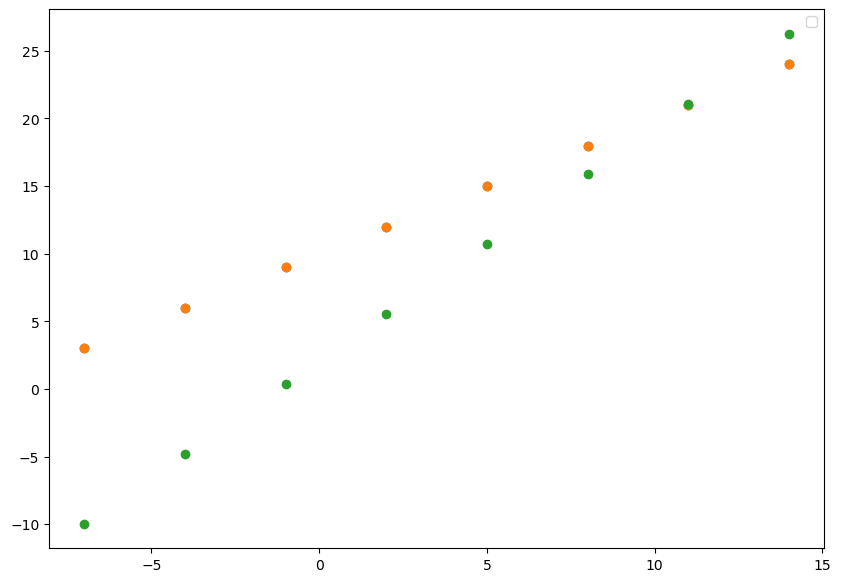

In [100]:
y_preds_2=model_2.predict(X)
plot_predictions(predictions=y_preds_2)

In [101]:
mae_2=tf.keras.metrics.mean_absolute_error(y_pred=y_preds_2.squeeze(),y_true=y).numpy()
mse_2=tf.keras.metrics.mean_squared_error(y_true=y,y_pred=y_preds_2.squeeze()).numpy()
mae_2,mse_2

(5.941329, 53.526447)

In [154]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    # tf.keras.layers.Dense(20), # added a new layer
    # tf.keras.layers.Dense(20), # added a new layer
    # tf.keras.layers.Dense(1),
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=150,verbose=0)

1/1 [==============================] - 0s 27ms/step


C:\Users\alok4\AppData\Local\Temp\ipykernel_26444\1924175654.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend();


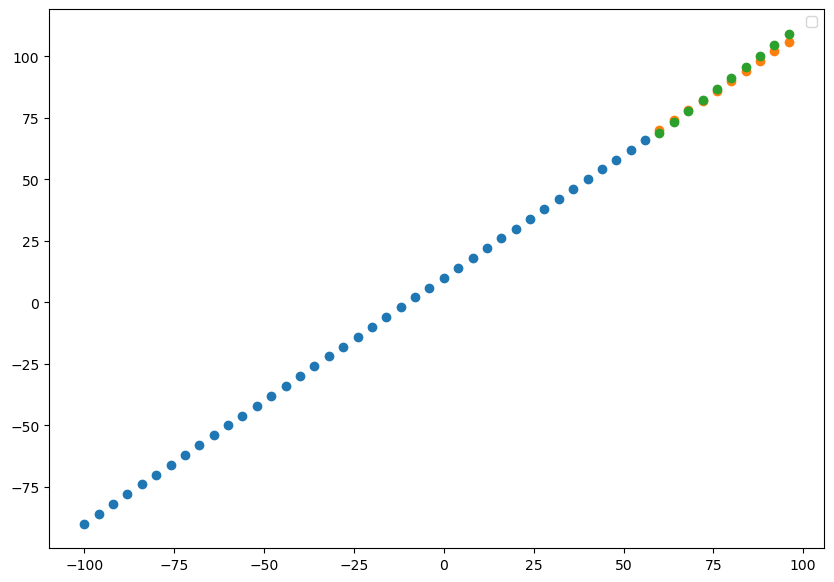

In [155]:
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)


![various options you can use to improve a neural network model](1_layer_100_epoch.png)


![various options you can use to improve a neural network model](2_layer_100_epoch.png)


![various options you can use to improve a neural network model](3_layer_100_epoch.png)


![various options you can use to improve a neural network model](4_layer_100_epoch.png)


![various options you can use to improve a neural network model](4_layer_200_epoch.png)

### Tracking our experiments

Using tools like:

* TensorBoard - a component of the Tensorflow library to help track modelling experiments.
* Weights & Biases - a tool for tracking all kinds of ML experiments.

### Saving a model

We can save a TF/Kerase model using `model.save()`

There are two ways to save a model in Tensorflow:
1. SavedModel format(default)
2. HDF5 format

The main difference between the two is the SavedModel is automatically able to save custom objects(such as `special layers`) without additional modifications when loading the model back in.

In [156]:
model_3.save("1_layer_150_epochs_model")

INFO:tensorflow:Assets written to: 1_layer_150_epochs_model\assets


INFO:tensorflow:Assets written to: 1_layer_150_epochs_model\assets


In [157]:
model_3.save("1_layer_150_epoch.h5")

c:\Users\alok4\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
